<a href="https://colab.research.google.com/github/pranjaldatta/Quick-Background-Change/blob/master/ChangeBackground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lets get the PyVision Repository
!git clone https://github.com/pranjaldatta/PyVision.git

# Lets clone the Quick-Change-Background repo to get the demo images 
!git clone https://github.com/pranjaldatta/Quick-Background-Change.git

In [159]:
# All our required imports go here

from PyVision.pyvision.segmentation import pspnet
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2 
from google.colab.patches import cv2_imshow

In [160]:
# We initialize the model here

model = pspnet.PSPNet(model="pspnet-resnet101-voc2012", device="gpu", save=None, show=None, draw_map=False, draw_blend=False)

/content/PyVision/pyvision/segmentation/pspnet/weights/pspnet-resnet101-voc2012.pth
Weights found.
loading


In [174]:
# storing the class list 
classes = model.class_names

img_path = "Quick-Background-Change/"

preds = model.inference(img_path+"test1.jpg", save=None)

In [175]:
# Let us define some utility functions 

def mask(preds, classes,  cls="person"):
  
  index = classes.index(cls)

  for i in range(preds.shape[0]):
    for j in range(preds.shape[1]):
      if preds[i][j] != index:
        preds[i][j] = 0
      else:
        preds[i][j] = 1
  return preds

def show_img(img):
  plt.imshow(img)
  plt.show()

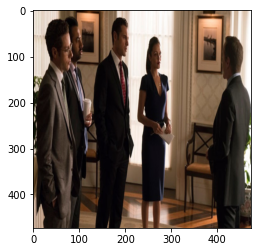

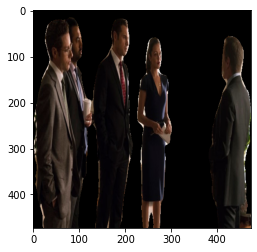

In [176]:
preds = mask(preds, classes)

img = Image.open(img_path+"test1.jpg").resize((473, 473))

show_img(img)

img = img * preds[..., None]
img = img.clip(0, 255)

show_img(img)

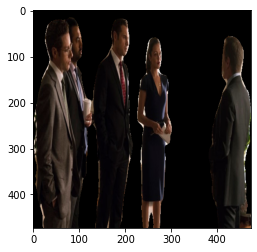

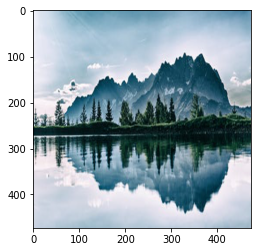

In [177]:
foreground = Image.fromarray(img.astype(np.uint8))
background = Image.open(img_path+"scenery.jpeg").resize((473, 473))

show_img(foreground)

show_img(background)

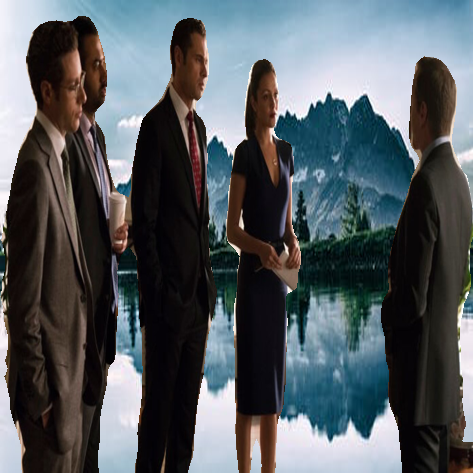

In [178]:
b , f = np.array(background), np.array(foreground)

b = b * (1 - preds[...,None])

new_img = cv2.add(b, f, dtype=cv2.CV_64F)

cv2_imshow(new_img[:,:,::-1])

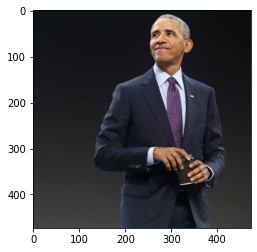

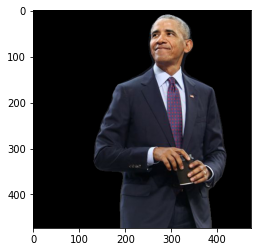

In [180]:
# Lets Try another set of foreground background combinations 

preds = model.inference(img_path+"obamatest1.jpg")

preds = mask(preds, classes)

img = Image.open(img_path+"obamatest1.jpg").resize((473, 473))

show_img(img)

img = img * preds[..., None]
img = img.clip(0, 255)

show_img(img)

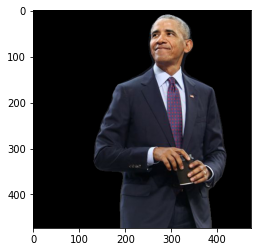

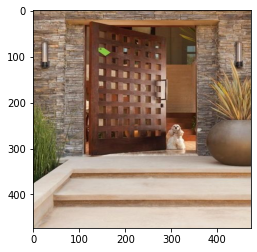

In [181]:
foreground = Image.fromarray(img.astype(np.uint8))
background = Image.open(img_path+"background1.jpg").resize((473, 473))

show_img(foreground)

show_img(background)

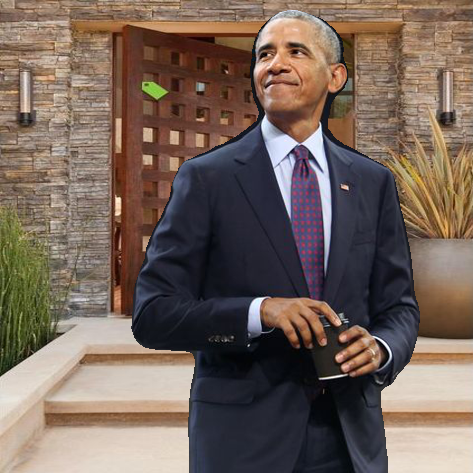

In [182]:
b , f = np.array(background), np.array(foreground)

b = b * (1 - preds[...,None])

new_img = cv2.add(b, f, dtype=cv2.CV_64F)

cv2_imshow(new_img[:,:,::-1])